### Results:
Paramaters  tested include learning_rate, n_estimators, and max_depth. After using grid search CV and testing various combiantions, the best combination was found to be learning_rate=0.2, max_depth=1, and n_estimators=200 with a training accuracy of 90.5% and testing of 89%.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
%pwd

'/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/Final_Project_github'

In [3]:
os.chdir('/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/Final_Project_github')
os.getcwd()

'/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/Final_Project_github'

In [4]:
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [5]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [13]:
y = Y.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 69) (1176,)
(294, 69) (294,)


In [57]:
gb = GradientBoostingClassifier()
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8562856112513524

In [58]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.95578231292517


In [60]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8707482993197279


In [61]:
# confusion matrix
pred = gb.predict(X_test)
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,247,6
1,32,9


In [62]:
# metrics
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       253
           1       0.60      0.22      0.32        41

    accuracy                           0.87       294
   macro avg       0.74      0.60      0.62       294
weighted avg       0.85      0.87      0.84       294



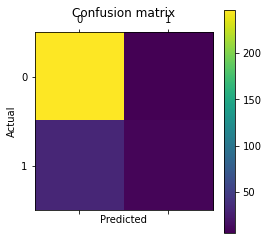

In [63]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
scores_params = []
for m in learning_rate:
    gb = GradientBoostingClassifier(learning_rate=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

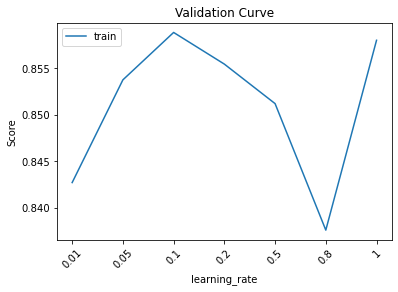

In [65]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(learning_rate)), learning_rate, rotation=45)
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [66]:
n_estimators = [50, 75, 100, 150, 200, 250, 300]

In [67]:
scores_params = []
for m in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=m)
    scores = cross_val_score(gb, X=X_train, y=y_train, scoring='accuracy', cv=5)
#     print(scores)
    scores_params.append(scores.mean())

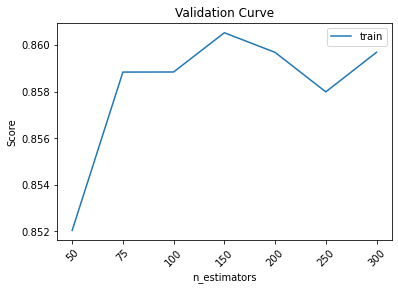

In [68]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [123]:
gb = GradientBoostingClassifier(learning_rate=0.2)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [124]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.9872448979591837


In [125]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8809523809523809


### Grid Search

In [75]:
params = dict(
    learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
    n_estimators = [25, 50, 75, 100, 150, 200]
)

params

{'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
 'n_estimators': [25, 50, 75, 100, 150, 200]}

In [76]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='f1', cv=5, n_jobs=-1, )
gs

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='f1')

In [77]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
                         'n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='f1')

In [78]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=200)

In [79]:
#learning_rate = 1 n_estimator = 150
gs.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [82]:
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.8605442176870748

In [84]:
# confusion matrix
gbcm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,242,11
1,30,11


In [83]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       253
           1       0.50      0.27      0.35        41

    accuracy                           0.86       294
   macro avg       0.69      0.61      0.64       294
weighted avg       0.84      0.86      0.84       294



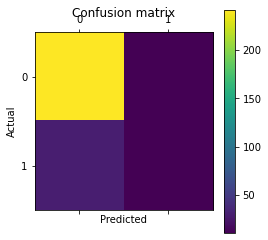

In [85]:
import pylab as plt
%matplotlib inline
plt.matshow(gbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

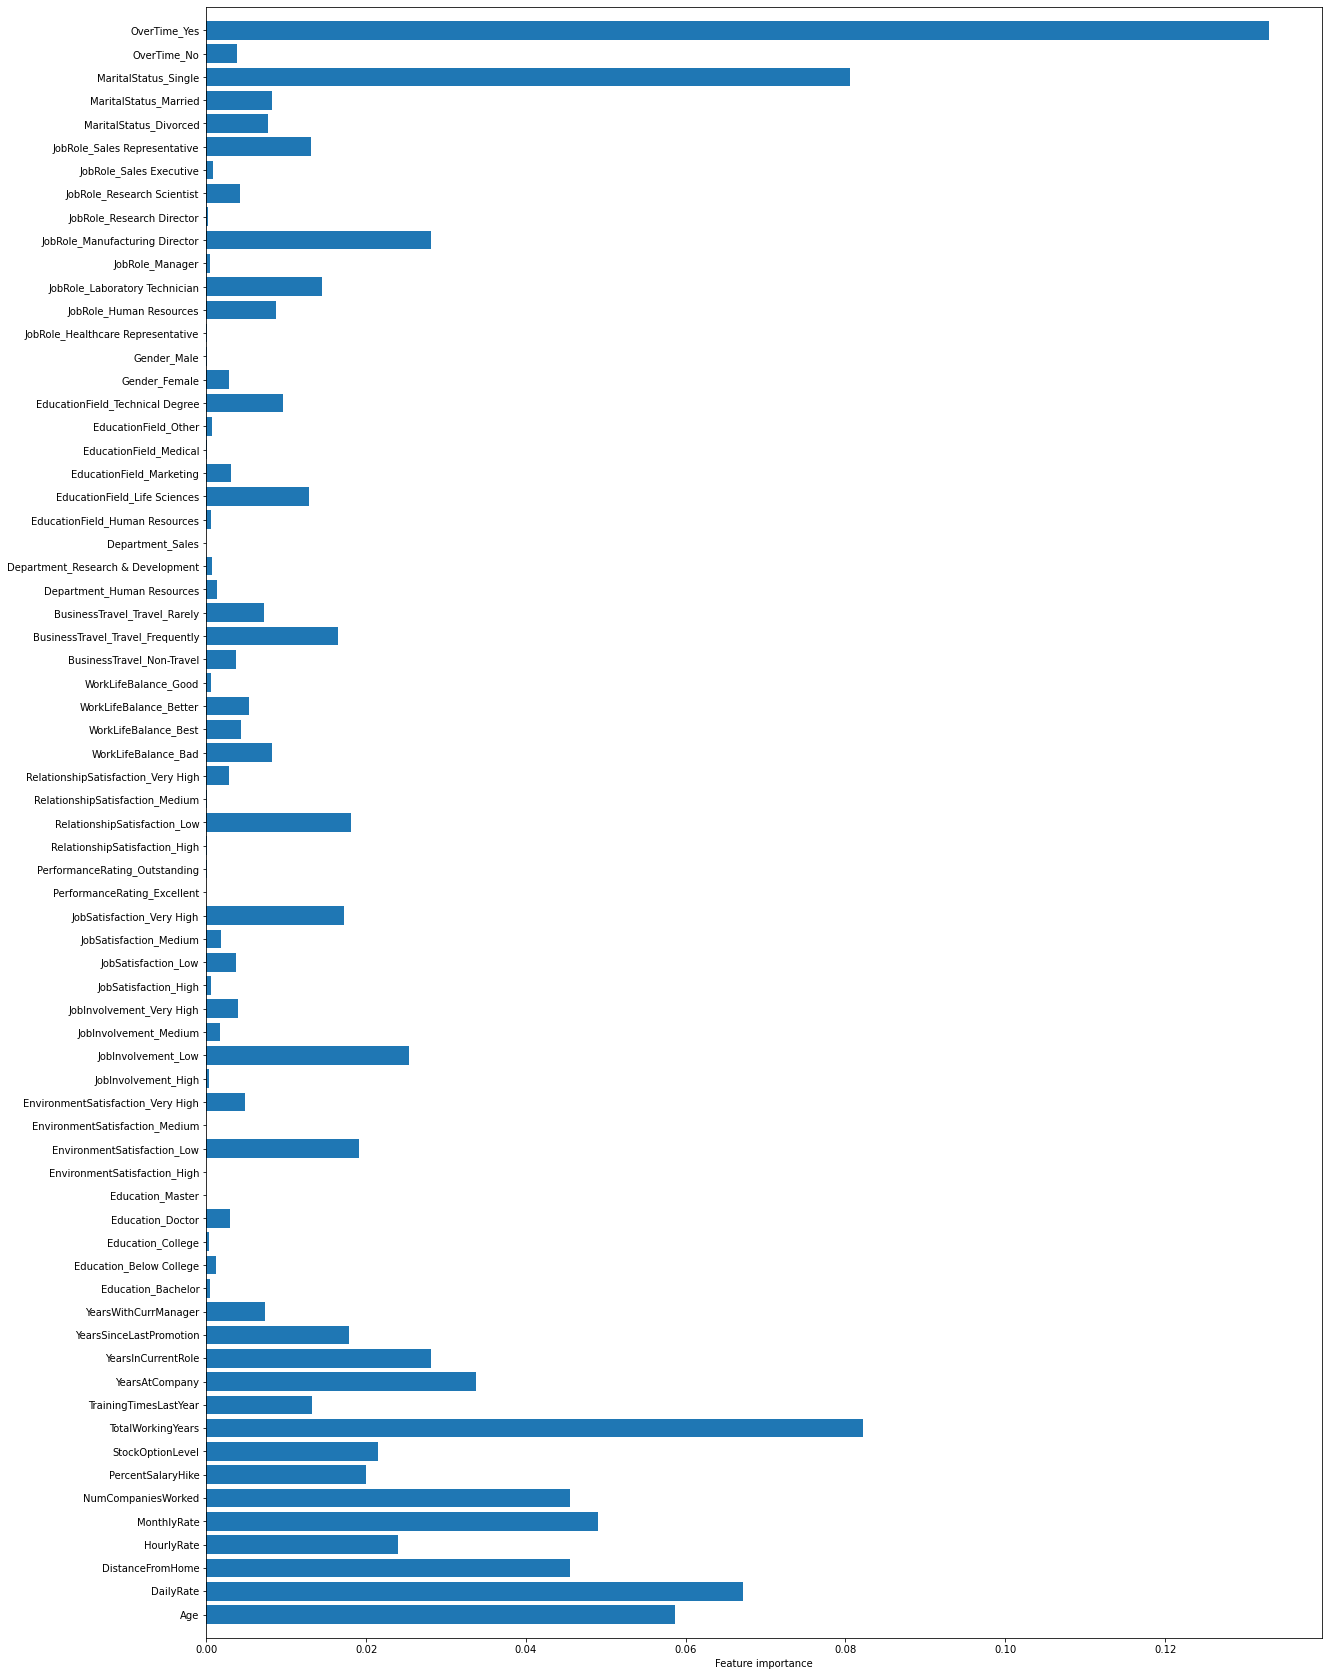

In [91]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (20,30))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

In [95]:
gboost = GradientBoostingClassifier(learning_rate=0.1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8605481428056259

In [96]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [110]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 200, 250, 300],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}

0.0 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.0 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.0 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.01 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
0.036 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.061 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300}
0.0 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.0 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.066 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.133 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
0.158 (+/-0.06) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.179 (+/-0.066) for {'learning_rate': 0.01, 'max_depth

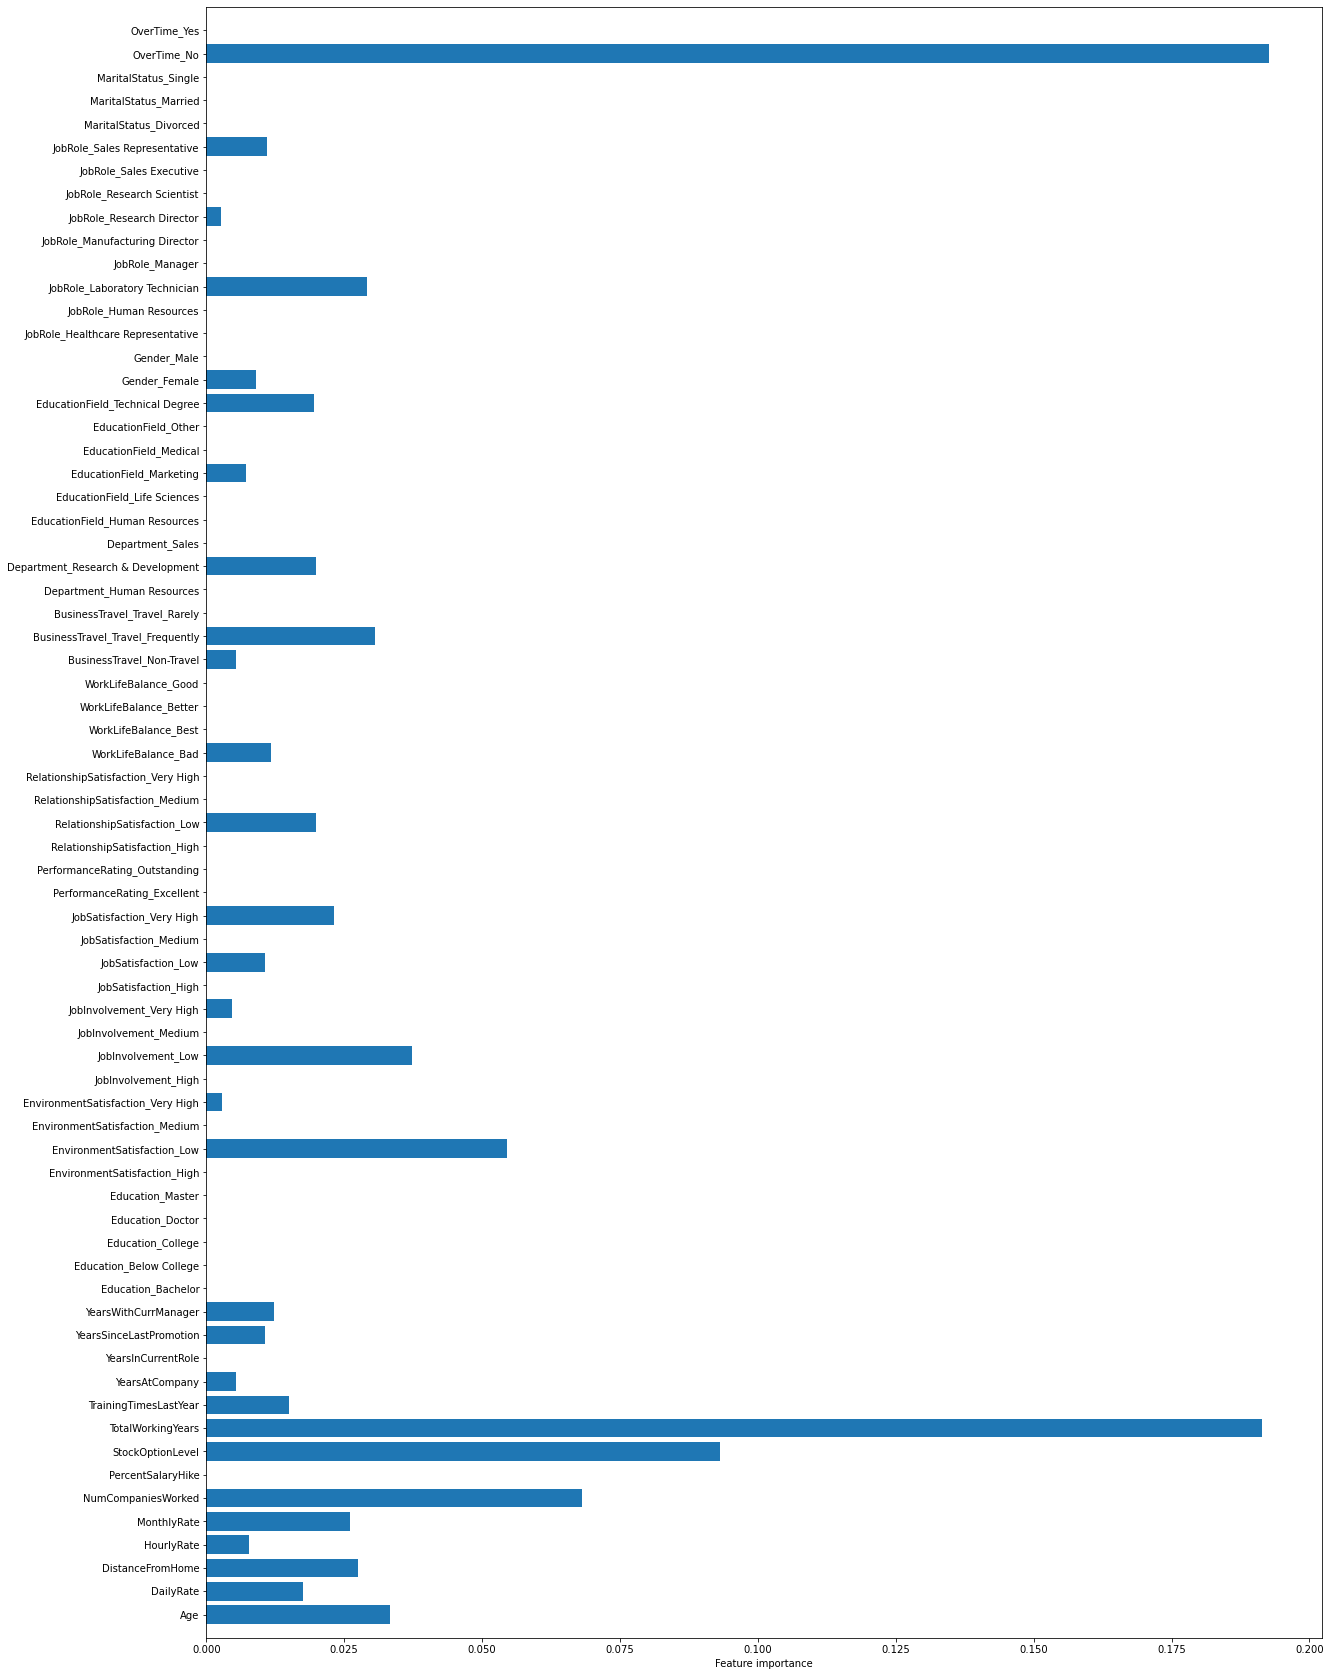

In [111]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (20,30))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(cv.best_estimator_, df=X_train)

In [143]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.5]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='recall')
cv.fit(X, Y.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 200}

0.118 (+/-0.058) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.224 (+/-0.089) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
0.279 (+/-0.185) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.321 (+/-0.15) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.3 (+/-0.097) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.296 (+/-0.15) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.287 (+/-0.107) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
0.266 (+/-0.11) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.241 (+/-0.101) for {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
0.232 (+/-0.074) for {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
0.254 (+/-0.116) for {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100}
0.338 (+/-0.1) for {'learning_rate': 0.2

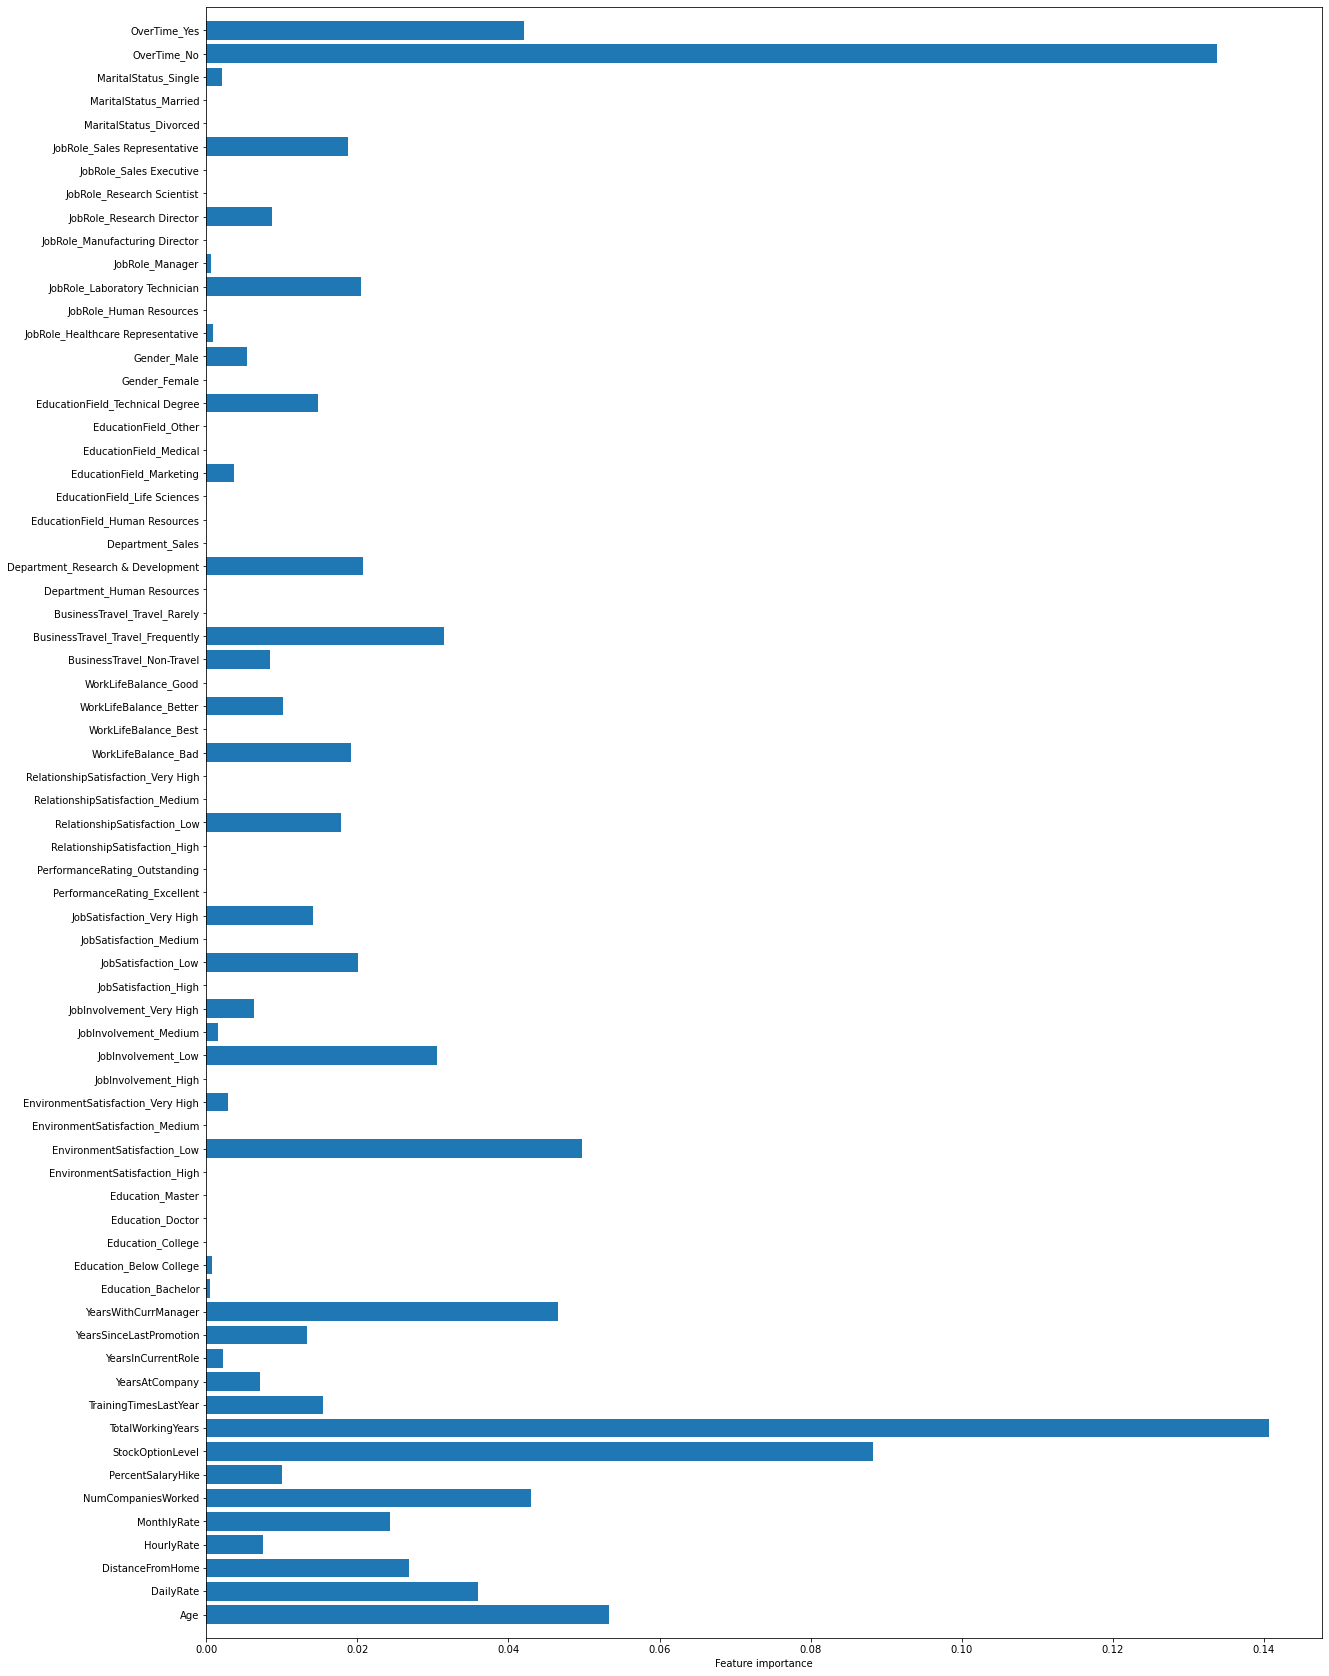

In [144]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    fig = plt.figure(figsize = (20,30))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(cv.best_estimator_, df=X)

In [105]:
#0.735 (+/-0.207) for {'learning_rate': 100, 'max_depth': 5, 'n_estimators': 5}
#{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 500}
gboost = GradientBoostingClassifier(learning_rate=1, n_estimators= 500)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8571547060944825

In [106]:
gboost = GradientBoostingClassifier(learning_rate=0.1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8605481428056259

In [152]:
#{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}
gboost = GradientBoostingClassifier(learning_rate=0.2, n_estimators= 200, max_depth=1)
scores = cross_val_score(gboost, X_train, y_train, cv=5)
scores.mean()

0.8724522178146412

In [148]:
gb = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, max_depth=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=200)

In [149]:
# training accuracy
pred = gb.predict(X_train)
print(accuracy_score(y_train, pred))

0.9047619047619048


In [150]:
# testing accuracy
pred = gb.predict(X_test)
print(accuracy_score(y_test, pred))

0.891156462585034
